## Drosophila Examples for Pairwise Alignment

In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'
import sys
sys.path.insert(0,'../')
import morpho

import matplotlib.pyplot as plt
import scanpy
import numpy as np
from jupyterthemes import jtplot
jtplot.style(theme="onedork")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
%load_ext autoreload
%autoreload 2

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [4]:
data_dir='../data/cellbin_h5ad'
slices = [scanpy.read_h5ad(os.path.join(data_dir, "E8-10_b_S{:0>2d}.h5ad".format(index))) for index in range(5,30)]

In [26]:
adata = scanpy.read('../data/SCT_h5ad/E16-18h_a_SCT_anno.h5ad')
slices = [adata[adata.obs['slice_ID']==sliceID] for sliceID in adata.obs['slice_ID'].cat.categories]
for i in range(len(slices)):slices[i].obsm['spatial'] = slices[i].obsm['spatial'].to_numpy()[:,0:2]

In [53]:
data_dir='../data/E3_5_4h_d/bin20_data'
# data_dir='../data/E3_5_4h_d/final_seg_data'
slices = [scanpy.read_h5ad(os.path.join(data_dir, file_name)) for file_name in sorted(os.listdir(data_dir))]

In [60]:
i = 4
BAS_slices = [slice.copy() for slice in slices]
sliceA = BAS_slices[i]
sliceB = BAS_slices[i + 1]
align_model_A, align_model_B, P, vecfld = morpho.morpho_align_pairwise(
            model_ref=sliceA,
            model=sliceB,
            spatial_key="spatial",
            key_added="align_spatial",
            select_high_exp_genes=False,
            normalize_c=True,
            normalize_g=False,
            mode="SN",
            device="1",
            max_iter=100,
            dtype='float64',
            beta2=0.05,
            verbose=True,
            iter_key_added='iter_spatial',
            keep_size=False,
        )

PASTE_slices = [sliceA,sliceB]
align_models, _ = morpho.models_align(
            models=PASTE_slices,
            spatial_key="spatial",
            key_added="align_spatial",
            # device="3",
            )



|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 6819 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 244.3592026851766.
|-----> [Start morpho alignment] in progress: 89.0000%gamma: 0.99
beta2: 0.05
sigma2: 0.004477510512283833
|-----> [Models alignment] in progress: 100.0000%|-----> Filtered all samples for common genes. There are 6819 common genes.
|-----> [Models alignment] in progress: 100.0000%
|-----> [Models alignment] finished [1.8197s]


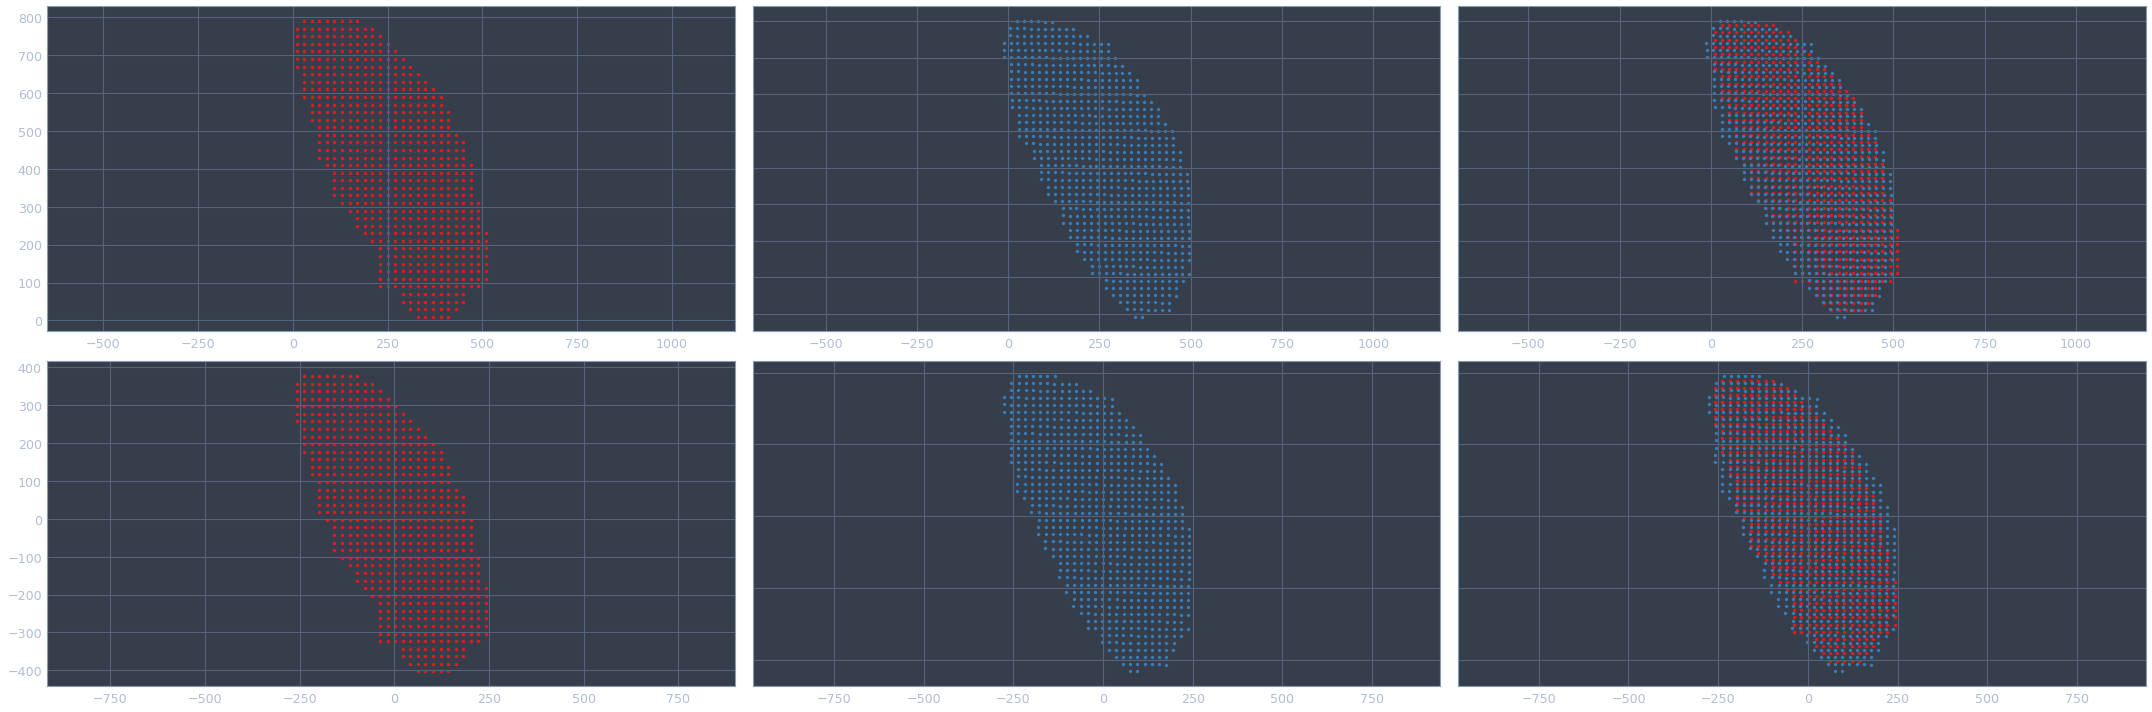

In [61]:
%matplotlib inline
fig, axs = plt.subplots(2, 3,figsize=(30,10))
morpho.plot_pairewise_slices(
        sliceA_align=align_model_A, 
        sliceB_align=align_model_B,
        axs=axs[0],
        spatial_key='align_spatial'
    )
morpho.plot_pairewise_slices(
        sliceA_align=align_models[0], 
        sliceB_align=align_models[1],
        axs=axs[1],
        spatial_key='align_spatial'
    )
plt.tight_layout()
plt.show()